# ART HopSkipJump Attack

In [32]:
%matplotlib inline

import numpy as np
import keras
from keras.preprocessing import image
from keras.layers import Dense, Flatten
from keras.models import Model
import keras.backend as k
from matplotlib import pyplot as plt
from IPython.display import clear_output

In [33]:
from art.estimators.classification import KerasClassifier
from art.attacks.evasion import HopSkipJump
from art.utils import to_categorical

In [187]:
np.set_printoptions(suppress=True)

## Lenet

In [415]:
import numpy as np
import os

import keras
from keras.datasets import mnist
from keras.layers import Conv2D, Dense, AveragePooling2D, Dropout, Flatten, Activation
from keras.optimizers import Adam
from keras.utils import to_categorical
from keras.models import Sequential
from keras import backend as K

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
#os.environ['CUDA_VISIBLE_DEVICES']='2' #使用GPU

In [416]:
from tensorflow.keras import activations

In [417]:
class LeNet5:
    @staticmethod
    def build(width, height, depth, classes):
        model = Sequential()
        inputShape = (height, width, depth)

        model.add(Conv2D(6, kernel_size=(5,5), padding="valid", activation=None, use_bias=False, input_shape=inputShape ))
        model.add(AveragePooling2D(pool_size=(2,2)))
        model.add(Activation(activations.sigmoid))
        model.add(Conv2D(16, kernel_size=(5,5), padding="valid", activation=None, use_bias=False))
        model.add(AveragePooling2D(pool_size=(2,2)))
        model.add(Activation(activations.sigmoid))
        model.add(Flatten())
        model.add(Dense(120, activation=None, use_bias=False))
        model.add(Dense(84, activation=None, use_bias=False))
        model.add(Dense(10, activation="softmax", use_bias=False))

        return model

In [418]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

y_train=to_categorical(y_train,num_classes=10)
y_test=to_categorical(y_test,num_classes=10)

In [419]:
x_train_new = np.zeros((x_train.shape[0], 32, 32, 1))
for i in range (0, x_train.shape[0]):
    x_train_new[i] = np.pad(x_train[i].reshape(28, 28), [(2, ), (2, )], mode='constant').reshape(32, 32, 1)
x_train = x_train_new

In [420]:
x_test_new = np.zeros((x_test.shape[0], 32, 32, 1))
for i in range (0, x_test.shape[0]):
    x_test_new[i] = np.pad(x_test[i].reshape(28, 28), [(2, ), (2, )], mode='constant').reshape(32, 32, 1)
x_test = x_test_new

In [421]:
model = LeNet5.build(32, 32, 1, 10)
model.compile(loss="categorical_crossentropy", optimizer=Adam(lr=5e-4), metrics=["accuracy"])
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 28, 28, 6)         150       
_________________________________________________________________
average_pooling2d_9 (Average (None, 14, 14, 6)         0         
_________________________________________________________________
activation_3 (Activation)    (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 10, 10, 16)        2400      
_________________________________________________________________
average_pooling2d_10 (Averag (None, 5, 5, 16)          0         
_________________________________________________________________
activation_4 (Activation)    (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 400)              

In [422]:
model.fit(x_train,y_train,batch_size=120,epochs=7)

Epoch 1/7
60000/60000 [==============================] - 30s 497us/step - loss: 0.6893 - accuracy: 0.8004
Epoch 2/7
60000/60000 [==============================] - 28s 462us/step - loss: 0.2374 - accuracy: 0.9266
Epoch 3/7
60000/60000 [==============================] - 27s 453us/step - loss: 0.1613 - accuracy: 0.9491
Epoch 4/7
60000/60000 [==============================] - 26s 441us/step - loss: 0.1296 - accuracy: 0.9603
Epoch 5/7
60000/60000 [==============================] - 28s 462us/step - loss: 0.1178 - accuracy: 0.9637
Epoch 6/7
60000/60000 [==============================] - 27s 456us/step - loss: 0.1057 - accuracy: 0.9671
Epoch 7/7
60000/60000 [==============================] - 26s 441us/step - loss: 0.0986 - accuracy: 0.9697s - l


In [423]:
# for i in [0, 2, 5, 6, 7]:
#     x = model.layers[i].get_weights()[0] #weights
#     y = model.layers[i].get_weights()[1] #array of biases
#     y = np.zeros(y.shape)
#     l=[]
#     l.append(x)
#     l.append(y)
#     model.layers[i].set_weights(l)

In [424]:
model.save('lenet.h5')

In [9]:
from keras.models import load_model
model = load_model('lenet.h5')

# Model Definition

In [425]:
classifier = KerasClassifier(clip_values=(0, 255), model=model)

# Get Target and Init Images

In [426]:
init_image = x_test[2].reshape(1, 32, 32, 1)

Init image is:  1


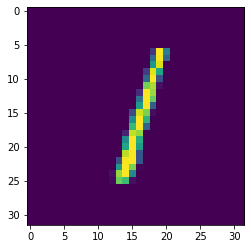

In [427]:
print( "Init image is: ", np.argmax(classifier.predict(init_image)) )
plt.imshow(init_image.reshape(32, 32).astype(np.uint))
plt.show()

In [428]:
target_image = x_test[0].reshape(1, 32, 32, 1)

Target image is:  7


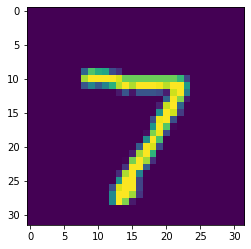

In [429]:
print( "Target image is: ", np.argmax(classifier.predict(target_image)) )
plt.imshow(target_image.reshape(32, 32).astype(np.uint))
plt.show()

In [430]:
from PIL import Image

Target image is:  8


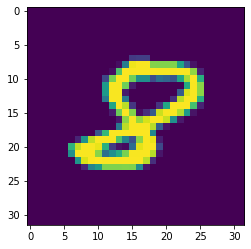

In [492]:
test_image = x_test[61].reshape(1, 32, 32, 1)
print( "Target image is: ", np.argmax(classifier.predict(test_image)) )
# Image.fromarray(test_image).save("test.bmp")
plt.imshow(test_image.reshape(32, 32).astype(np.uint))
plt.show()

In [493]:
classifier.predict(test_image)

array([[0.0002379 , 0.00000002, 0.0034712 , 0.00063   , 0.00000199,
        0.00055088, 0.00000538, 0.00000518, 0.91464996, 0.08044745]],
      dtype=float32)

In [494]:
Image.fromarray(test_image.reshape(32, 32).astype(np.uint8)).save('test.bmp', 'bmp')

In [79]:
y_pred = np.argmax(classifier.predict(x_test), axis=1)
y_tests = np.argmax(y_test, axis=1)

In [19]:
from sklearn.metrics import accuracy_score

In [20]:
accuracy_score(y_tests, y_pred)

0.9834

In [495]:
np.argmax(classifier.predict(np.transpose(test_image, (0, 1, 2, 3))))

8

#### Conv1 

In [466]:
conv1_layer_model = Model(inputs=model.input,outputs=model.get_layer('conv2d_10').output)
conv1_output = conv1_layer_model.predict(test_image)
print (conv1_output.shape)

(1, 28, 28, 6)


In [467]:
model.layers[0].get_weights()[0].shape

(5, 5, 1, 6)

In [468]:
model.layers[0].get_weights()[0][:, :, 0, 0]

array([[-0.00940436,  0.01238783,  0.08522091,  0.23030287, -0.06636436],
       [-0.12811314, -0.11629552, -0.08097397, -0.14692259,  0.03437737],
       [-0.00408758, -0.05341248, -0.1170335 , -0.18058164, -0.06306452],
       [-0.07540231,  0.13595513,  0.10336275, -0.04381952, -0.17583062],
       [ 0.09461226,  0.05428668, -0.04073516,  0.05871759, -0.04187211]],
      dtype=float32)

In [469]:
np.transpose(model.layers[0].get_weights()[0], (2, 3, 0, 1))[0, 0, :, :]

array([[-0.00940436,  0.01238783,  0.08522091,  0.23030287, -0.06636436],
       [-0.12811314, -0.11629552, -0.08097397, -0.14692259,  0.03437737],
       [-0.00408758, -0.05341248, -0.1170335 , -0.18058164, -0.06306452],
       [-0.07540231,  0.13595513,  0.10336275, -0.04381952, -0.17583062],
       [ 0.09461226,  0.05428668, -0.04073516,  0.05871759, -0.04187211]],
      dtype=float32)

In [470]:
# NHWC --> NCWH
for i in range(500, 1000):
    print("%f, " % np.ravel(np.transpose(conv1_output, (0,3, 1, 2)))[i], end='')

0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, -0.879314, -48.969315, -62.115898, -32.995197, 66.749382, 41.763214, -4.491217, -1.172302, -1.067402, -10.959412, -56.781990, -114.789391, -40.580032, 23.712622, -16.534016, -53.062279, -17.535212, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, -3.692443, -58.655502, -74.056870, -65.146935, -9.483094, -19.100613, -20.443951, -1.716756, -8.528896, -40.043823, -70.350754, -70.799370, 2.337719, 4.618625, -51.988262, -56.396523, -14.194376, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, -1.324355, -58.971607, -96.345642, -21.910297, -0.480393, -30.572182, -9.912743, -1.177528, -28.980656, -47.404484, -58.046257, -16.260208, 18.793110, -13.085966, -73.957314, -40.326511, -6.211883, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000

#### AVG1

In [471]:
avg1_layer_model = Model(inputs=model.input,outputs=model.get_layer('activation_3').output)
avg1_output = avg1_layer_model.predict(test_image)
print (avg1_output.shape)

(1, 14, 14, 6)


In [489]:
avg1_output[0, 0:5, 0:5, 0]

array([[0.5       , 0.5       , 0.5       , 0.5       , 0.5       ],
       [0.5       , 0.5       , 0.5       , 0.5       , 0.5       ],
       [0.5       , 0.5       , 0.5       , 0.5       , 0.15751848],
       [0.5       , 0.5       , 0.5       , 0.5       , 0.00149202],
       [0.5       , 0.5       , 0.5       , 0.5       , 0.00001699]],
      dtype=float32)

#### conv2

In [475]:
model.layers[3].get_weights()[0].shape

(5, 5, 6, 16)

In [487]:
model.layers[3].get_weights()[0][:, :, 0, 0]

array([[-0.06308769, -0.10652678,  0.00386955,  0.04662913, -0.09070916],
       [ 0.05483643, -0.07800327,  0.09089689,  0.13907705,  0.15911043],
       [ 0.0543736 ,  0.00995695,  0.10237548,  0.2864901 ,  0.37455496],
       [-0.02871806, -0.06390347,  0.01901451,  0.04063466,  0.17830536],
       [ 0.05652579,  0.00874689,  0.08134255, -0.03306204,  0.09979029]],
      dtype=float32)

In [477]:
conv2_layer_model = Model(inputs=model.input,outputs=model.get_layer('conv2d_11').output)
conv2_output = conv2_layer_model.predict(test_image)
print (conv2_output.shape)

(1, 10, 10, 16)


In [478]:
conv2_output[0, :, :, 0]

array([[-0.6977773 , -1.399948  , -1.7572062 , -1.2884461 , -2.4566717 ,
        -3.4471638 , -3.4261355 , -3.3875382 , -3.0281632 , -2.8107133 ],
       [-0.8541142 , -1.618419  , -1.3967028 , -0.9263687 , -1.1883893 ,
        -1.1231524 , -0.8038418 ,  0.28432372, -0.12867945, -0.7247988 ],
       [-0.632269  , -1.1757573 , -0.53068787, -0.22232294, -0.86967725,
        -0.9804857 , -0.30011857,  0.72192895,  0.7173996 ,  0.8721546 ],
       [-0.7640483 , -1.3091912 , -0.9213387 , -1.2764814 , -1.9593457 ,
        -1.8753002 , -1.0923526 , -0.8060242 , -0.7841174 ,  0.2221055 ],
       [-0.9871993 , -1.1429964 , -1.0060517 , -1.275858  , -1.2276856 ,
        -0.5364125 , -0.00881648, -1.3157339 , -1.9084327 , -0.9983195 ],
       [-0.79372174, -0.27089503, -0.15854278, -0.5609628 , -0.0620586 ,
         1.7979039 ,  1.6100407 ,  0.0207769 , -1.2180682 , -0.90480405],
       [-0.7899457 , -0.14998734, -0.29051906, -1.4806172 , -0.5886521 ,
         0.5763054 ,  0.9835081 , -0.07409722

In [479]:
# NHWC --> NCHW
for i in range(0, 100):
    print("%f, " % np.ravel(np.transpose(conv2_output, (0, 3, 1, 2)))[i], end='')

-0.697777, -1.399948, -1.757206, -1.288446, -2.456672, -3.447164, -3.426136, -3.387538, -3.028163, -2.810713, -0.854114, -1.618419, -1.396703, -0.926369, -1.188389, -1.123152, -0.803842, 0.284324, -0.128679, -0.724799, -0.632269, -1.175757, -0.530688, -0.222323, -0.869677, -0.980486, -0.300119, 0.721929, 0.717400, 0.872155, -0.764048, -1.309191, -0.921339, -1.276481, -1.959346, -1.875300, -1.092353, -0.806024, -0.784117, 0.222106, -0.987199, -1.142996, -1.006052, -1.275858, -1.227686, -0.536412, -0.008816, -1.315734, -1.908433, -0.998320, -0.793722, -0.270895, -0.158543, -0.560963, -0.062059, 1.797904, 1.610041, 0.020777, -1.218068, -0.904804, -0.789946, -0.149987, -0.290519, -1.480617, -0.588652, 0.576305, 0.983508, -0.074097, -1.032775, -0.729434, -1.170408, -1.184558, -2.444582, -3.390115, -2.408972, -1.986349, -1.550110, -1.283255, -0.731664, 0.215933, -1.008664, -1.037537, -2.110614, -2.279648, -2.420305, -2.438503, -1.977605, -0.291490, 0.762867, 1.158314, -0.161465, 0.341641, 0.

#### avg2

#### F7

In [ ]:
f4_layer_model = Model(inputs=model.input,outputs=model.get_layer('flatten_4').output)
f4_output = f4_layer_model.predict(test_image)
print (f4_output.shape)

In [ ]:
f4_output

In [490]:
f4_layer_model = Model(inputs=model.input,outputs=model.get_layer('dense_15').output)
f4_output = f4_layer_model.predict(test_image)
print (f4_output.shape)

(1, 10)


In [491]:
f4_output

array([[0.00007125, 0.00000002, 0.00000004, 0.00026757, 0.00000008,
        0.997652  , 0.00001468, 0.00000088, 0.00164508, 0.00034858]],
      dtype=float32)

# Export Weights

### Parameter 存放格式
**image**和**parameter**存放在`input_array`中
> iamge 32x32=1024

> layer1 weights  5x5x6 = 25x6 = 150

> layer3 weights  5x5x6x16 = 25x6x16 =2400

> layer5 weights 400x120 = 48000

> layer6 weights 84x120 = 10080

> layer7 weights 10x84 = 840

> 1024+150+2400+48000+10080+840=62494

- input_array[0:149] = layer1 weights    **[Output Channel,Row,Column]**
- input_array[150:2549] = layer3 weights    **[Output Channel,Input Channel,Row,Column]**
- input_array[2550:50549] = layer5 weights    **[Output Channel,Input Channel]**
- input_array[50550:60629] = layer6 weights      **[Output Channel,Input Channel]**
- input_array[60630:61469] = layer7 weights      **[Output Channel,Input Channel]**
- input_array[61470:62493] = image[0,0],image[0,1]...image[0,31],image[1,0]...image[31,31]     **[row,column]**

In [480]:
input_array = np.arange(0,62494,1,dtype=np.float32) #just for test

In [481]:
np.transpose(model.layers[3].get_weights()[0], (3, 2, 1, 0)).shape

(16, 6, 5, 5)

In [482]:
np.transpose(model.layers[9].get_weights()[0], (1, 0)).shape

(10, 84)

In [506]:
x_adv[0].shape

(32, 32, 1)

In [507]:
input_array[0:150] = np.ravel(np.transpose(model.layers[0].get_weights()[0], (3, 2, 0, 1)))
input_array[150:2550] = np.ravel(np.transpose(model.layers[3].get_weights()[0], ( 3, 2, 0, 1)))
input_array[2550:50550] = np.ravel(np.transpose(model.layers[7].get_weights()[0], (1, 0)))
input_array[50550:60630] = np.ravel(np.transpose(model.layers[8].get_weights()[0], (1, 0)))
input_array[60630:61470] = np.ravel(np.transpose(model.layers[9].get_weights()[0], (1, 0)))
input_array[61470:62494] = np.ravel(x_adv[0])

In [508]:
import pickle

In [509]:
with open('input_array_attack.pickle', 'wb') as f:
    # Pickle the 'data' dictionary using the highest protocol available.
    pickle.dump(input_array, f, pickle.HIGHEST_PROTOCOL)

In [510]:
with open('input_array_attack.txt', 'w') as f:
    # Pickle the 'data' dictionary using the highest protocol available.
    for i in range(0, input_array.shape[0]):
        f.write("%f\n" % (input_array[i]))

# HopSkipJump Untargeted Attack

In [502]:
attack = HopSkipJump(classifier=classifier, targeted=False, max_iter=0, max_eval=1000, init_eval=10)
iter_step = 10
x_adv = None
for i in range(20):
    x_adv = attack.generate(x=init_image, x_adv_init=x_adv, resume=True)

    #clear_output()
    print("Adversarial image at step %d." % (i * iter_step), "L2 error", 
          np.linalg.norm(np.reshape(x_adv[0] - target_image, [-1])),
          "and class label %d." % np.argmax(classifier.predict(x_adv)[0]))
#     plt.imshow(x_adv[0].reshape(32, 32).astype(np.uint))
#     plt.show(block=False)
    
    attack.max_iter = iter_step

HopSkipJump: 100%|███████████████████████████████| 1/1 [00:00<00:00,  7.64it/s]


Adversarial image at step 0. L2 error 2131.900892815163 and class label 6.


HopSkipJump:   0%|                                       | 0/1 [00:00<?, ?it/s]

Adversarial image at step 10. L2 error 2154.9085992598934 and class label 6.


HopSkipJump:   0%|                                       | 0/1 [00:00<?, ?it/s]

Adversarial image at step 20. L2 error 2162.1802677095498 and class label 6.


HopSkipJump:   0%|                                       | 0/1 [00:00<?, ?it/s]

Adversarial image at step 30. L2 error 2163.178540847636 and class label 6.


HopSkipJump:   0%|                                       | 0/1 [00:00<?, ?it/s]

Adversarial image at step 40. L2 error 2164.2164349009304 and class label 6.


HopSkipJump:   0%|                                       | 0/1 [00:00<?, ?it/s]

Adversarial image at step 50. L2 error 2164.1695245875344 and class label 6.


HopSkipJump:   0%|                                       | 0/1 [00:00<?, ?it/s]

Adversarial image at step 60. L2 error 2164.9477801301337 and class label 6.


HopSkipJump:   0%|                                       | 0/1 [00:00<?, ?it/s]

Adversarial image at step 70. L2 error 2165.1102074252913 and class label 6.


HopSkipJump:   0%|                                       | 0/1 [00:00<?, ?it/s]

Adversarial image at step 80. L2 error 2165.458438148998 and class label 6.


HopSkipJump:   0%|                                       | 0/1 [00:00<?, ?it/s]

Adversarial image at step 90. L2 error 2165.989423916225 and class label 6.


HopSkipJump:   0%|                                       | 0/1 [00:00<?, ?it/s]

Adversarial image at step 100. L2 error 2166.222901928274 and class label 6.


HopSkipJump:   0%|                                       | 0/1 [00:00<?, ?it/s]

Adversarial image at step 110. L2 error 2166.40358497685 and class label 6.


HopSkipJump:   0%|                                       | 0/1 [00:00<?, ?it/s]

Adversarial image at step 120. L2 error 2166.5482968908223 and class label 6.


HopSkipJump:   0%|                                       | 0/1 [00:00<?, ?it/s]

Adversarial image at step 130. L2 error 2166.722513276845 and class label 6.


HopSkipJump:   0%|                                       | 0/1 [00:00<?, ?it/s]

Adversarial image at step 140. L2 error 2166.948707902128 and class label 6.


HopSkipJump:   0%|                                       | 0/1 [00:00<?, ?it/s]

Adversarial image at step 150. L2 error 2166.676692104293 and class label 6.


HopSkipJump:   0%|                                       | 0/1 [00:00<?, ?it/s]

Adversarial image at step 160. L2 error 2166.7090086242924 and class label 6.


HopSkipJump:   0%|                                       | 0/1 [00:00<?, ?it/s]

Adversarial image at step 170. L2 error 2167.0763036588255 and class label 6.


HopSkipJump:   0%|                                       | 0/1 [00:00<?, ?it/s]

Adversarial image at step 180. L2 error 2167.3192867503394 and class label 6.


HopSkipJump: 100%|███████████████████████████████| 1/1 [00:02<00:00,  2.11s/it]

Adversarial image at step 190. L2 error 2167.444991915985 and class label 6.


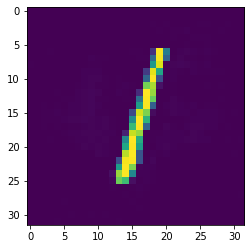

In [503]:
plt.imshow(x_adv[0].reshape(32, 32).astype(np.uint))

In [504]:
np.argmax(classifier.predict(x_adv)[0])

6

In [141]:
input_array = np.arange(0,62494,1,dtype=np.float32) #just for test
input_array[0:150] = np.ravel(np.transpose(model.layers[0].get_weights()[0], (3, 2, 1, 0)))
input_array[150:2550] = np.ravel(np.transpose(model.layers[3].get_weights()[0], (3, 2, 1, 0)))
input_array[2550:50550] = np.ravel(np.transpose(model.layers[7].get_weights()[0], (1, 0)))
input_array[50550:60630] = np.ravel(np.transpose(model.layers[8].get_weights()[0], (1, 0)))
input_array[60630:61470] = np.ravel(np.transpose(model.layers[9].get_weights()[0], (1, 0)))
input_array[61470:62494] = np.ravel(x_adv)

In [142]:
with open('input_array_adv_u.pickle', 'wb') as f:
    # Pickle the 'data' dictionary using the highest protocol available.
    pickle.dump(input_array, f, pickle.HIGHEST_PROTOCOL)

# HopSkipJump Targeted Attack

HopSkipJump: 100%|███████████████████████████████████████| 1/1 [00:00<?, ?it/s]

Adversarial image at step 0. L2 error 2176.560819274297 and class label 1.


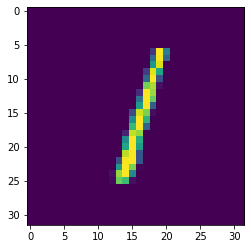

HopSkipJump: 100%|███████████████████████████████| 1/1 [00:00<00:00,  2.06it/s]


Adversarial image at step 10. L2 error 1612.8204698493892 and class label 1.


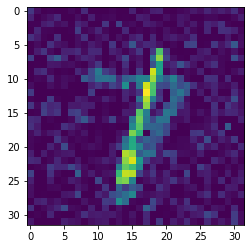

HopSkipJump: 100%|███████████████████████████████| 1/1 [00:00<00:00,  1.31it/s]


Adversarial image at step 20. L2 error 1573.4577456319967 and class label 1.


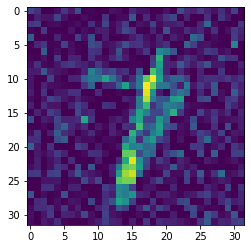

HopSkipJump: 100%|███████████████████████████████| 1/1 [00:00<00:00,  1.36it/s]


Adversarial image at step 30. L2 error 1329.3748578258126 and class label 1.


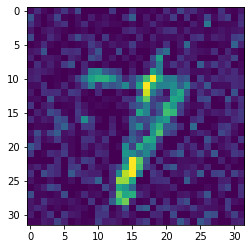

HopSkipJump: 100%|███████████████████████████████| 1/1 [00:01<00:00,  1.05s/it]


Adversarial image at step 40. L2 error 945.5967172873374 and class label 1.


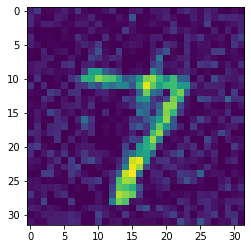

HopSkipJump: 100%|███████████████████████████████| 1/1 [00:00<00:00,  1.05it/s]


Adversarial image at step 50. L2 error 751.6665732260916 and class label 1.


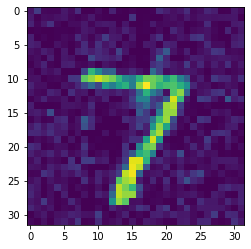

HopSkipJump: 100%|███████████████████████████████| 1/1 [00:01<00:00,  1.06s/it]


Adversarial image at step 60. L2 error 597.8017737111122 and class label 1.


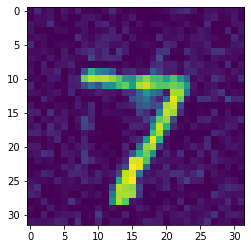

HopSkipJump: 100%|███████████████████████████████| 1/1 [00:01<00:00,  1.16s/it]


Adversarial image at step 70. L2 error 469.1900010935627 and class label 1.


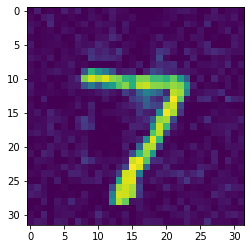

HopSkipJump: 100%|███████████████████████████████| 1/1 [00:01<00:00,  1.21s/it]


Adversarial image at step 80. L2 error 381.67698019074146 and class label 1.


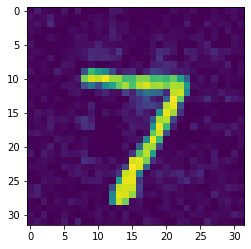

HopSkipJump: 100%|███████████████████████████████| 1/1 [00:01<00:00,  1.20s/it]


Adversarial image at step 90. L2 error 324.58840115146944 and class label 1.


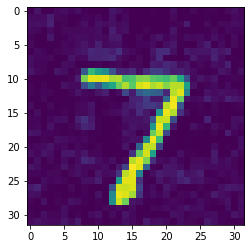

HopSkipJump: 100%|███████████████████████████████| 1/1 [00:01<00:00,  1.31s/it]


Adversarial image at step 100. L2 error 298.8289070849374 and class label 1.


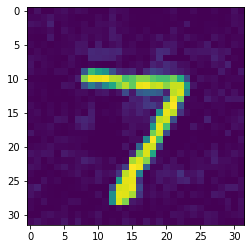

HopSkipJump: 100%|███████████████████████████████| 1/1 [00:01<00:00,  1.44s/it]


Adversarial image at step 110. L2 error 284.1836752964681 and class label 1.


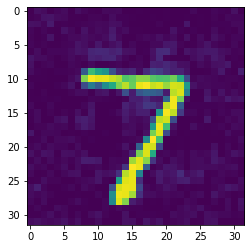

HopSkipJump: 100%|███████████████████████████████| 1/1 [00:01<00:00,  1.41s/it]


Adversarial image at step 120. L2 error 267.7281379895752 and class label 1.


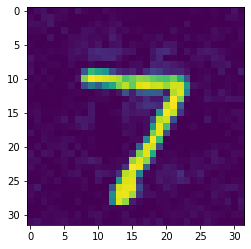

HopSkipJump: 100%|███████████████████████████████| 1/1 [00:01<00:00,  1.43s/it]


Adversarial image at step 130. L2 error 257.4771715472612 and class label 1.


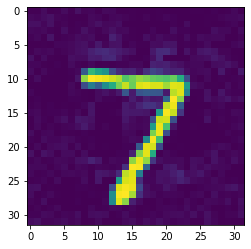

HopSkipJump: 100%|███████████████████████████████| 1/1 [00:01<00:00,  1.55s/it]


Adversarial image at step 140. L2 error 248.7263026662427 and class label 1.


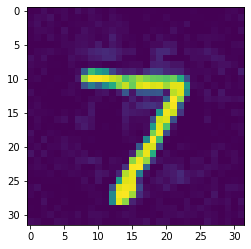

HopSkipJump: 100%|███████████████████████████████| 1/1 [00:01<00:00,  1.43s/it]


Adversarial image at step 150. L2 error 239.97717630078336 and class label 1.


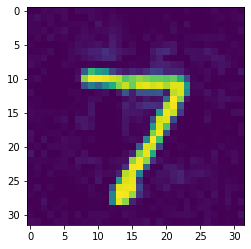

HopSkipJump: 100%|███████████████████████████████| 1/1 [00:01<00:00,  1.67s/it]


Adversarial image at step 160. L2 error 233.20779743614412 and class label 1.


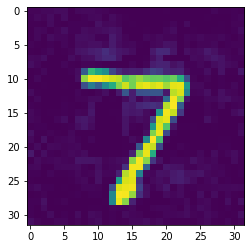

HopSkipJump: 100%|███████████████████████████████| 1/1 [00:02<00:00,  2.28s/it]


Adversarial image at step 170. L2 error 231.92850829312104 and class label 1.


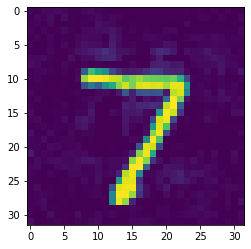

HopSkipJump: 100%|███████████████████████████████| 1/1 [00:01<00:00,  1.91s/it]


Adversarial image at step 180. L2 error 228.21999961906536 and class label 1.


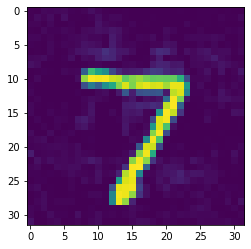

HopSkipJump: 100%|███████████████████████████████| 1/1 [00:02<00:00,  2.27s/it]


Adversarial image at step 190. L2 error 224.45705911688566 and class label 1.


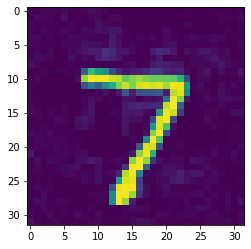

In [143]:
attack = HopSkipJump(classifier=classifier, targeted=True, max_iter=0, max_eval=1000, init_eval=10)
iter_step = 10
x_adv = init_image
for i in range(20):
    x_adv = attack.generate(x=target_image, y=to_categorical([1], 1000), x_adv_init=x_adv, resume=True)

    #clear_output()
    print("Adversarial image at step %d." % (i * iter_step), "L2 error", 
          np.linalg.norm(np.reshape(x_adv[0] - target_image, [-1])),
          "and class label %d." % np.argmax(classifier.predict(x_adv)[0]))
    plt.imshow(x_adv[0].reshape(32, 32).astype(np.uint))
    plt.show(block=False)
    
    attack.max_iter = iter_step

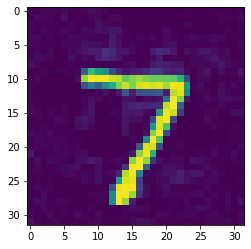

In [144]:
plt.imshow(x_adv[0].reshape(32, 32).astype(np.uint))

In [145]:
np.argmax(classifier.predict(x_adv.astype(np.uint).astype(np.float32))[0])

7

In [146]:
input_array = np.arange(0,62494,1,dtype=np.float32) #just for test
input_array[0:150] = np.ravel(np.transpose(model.layers[0].get_weights()[0], (3, 2, 1, 0)))
input_array[150:2550] = np.ravel(np.transpose(model.layers[3].get_weights()[0], (3, 2, 1, 0)))
input_array[2550:50550] = np.ravel(np.transpose(model.layers[7].get_weights()[0], (1, 0)))
input_array[50550:60630] = np.ravel(np.transpose(model.layers[8].get_weights()[0], (1, 0)))
input_array[60630:61470] = np.ravel(np.transpose(model.layers[9].get_weights()[0], (1, 0)))
input_array[61470:62494] = np.ravel(x_adv)

In [147]:
with open('input_array_adv_t.pickle', 'wb') as f:
    # Pickle the 'data' dictionary using the highest protocol available.
    pickle.dump(input_array, f, pickle.HIGHEST_PROTOCOL)